<a href="https://colab.research.google.com/github/ikarteeva/econometrictrend/blob/main/econometrictrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Выявление формулы линейного тренда**

**Сглаживание скользящими взвешенными средними**

In [3]:
import pandas as pd
excel_data_df = pd.read_excel('analysis.xlsx')

excel_data_df.head()

,t,yt
0,1,810
1,2,2500
2,3,2100
3,4,3700
4,5,4500


In [30]:
yts = []
yts.append(excel_data_df['yt'][0])
i=0
for element in excel_data_df['yt']:
  i=i+1
  if(i>excel_data_df['yt'].size-2):
    pass
  else:
    yts_per = (excel_data_df['yt'][i-1]+2*excel_data_df['yt'][i]+excel_data_df['yt'][i+1])/4
    yts.append(yts_per)
print(i)
yts.append(excel_data_df['yt'][i-1])

30


In [32]:
excel_data_df['yts'] = yts

In [33]:
excel_data_df.head()

,t,yt,yts
0,1,810,810.0
1,2,2500,1977.5
2,3,2100,2600.0
3,4,3700,3500.0
4,5,4500,4222.5


**Построение графиков**

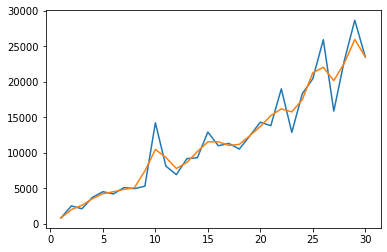

In [34]:
import matplotlib.pyplot as plt

plt.plot(excel_data_df['t'], excel_data_df['yt'])

plt.plot(excel_data_df['t'], excel_data_df['yts'])

**Вычисление переменных для СЛАУ**

In [71]:
t_list=excel_data_df['t'].values.tolist()
yts_list=excel_data_df['yts'].values.tolist()
i=0
t_sum=0
t2_sum=0
yts_sum=0
ytst_sum=0
while i<len(t_list):
  t_sum=t_list[i]+t_sum
  t2_sum=t_list[i]*t_list[i]+t2_sum
  yts_sum=yts_list[i]+yts_sum 
  ytst_sum=yts_list[i]*t_list[i]+ytst_sum
  i=i+1

print("Сумма по t:", t_sum, "| Сумма по t^2:", t2_sum, "| Сумма по yt:", yts_sum, "| Сумма по yt*t:", ytst_sum) 

Сумма по t: 465 | Сумма по t^2: 9455 | Сумма по yt: 352433.75 | Сумма по yt*t: 7215937.5


**Вычисление коэффициентов тренда**

In [65]:
import numpy as np

Matrix = np.array([[len(t_list), t_sum], [t_sum, t2_sum]]) 
Vektor = np.array([yts_sum, ytst_sum]) 

result_slau=np.linalg.solve(Matrix, Vektor)

print(result_slau)

[-343.34195402  780.07313682]
